<a href="https://colab.research.google.com/github/arianakrieger/PortfolioProjects/blob/main/Healthcare_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries


In [1]:
import kagglehub
import pandas as pd
import os
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Data

In [2]:
# Download latest version
path = kagglehub.dataset_download("prasad22/healthcare-dataset")
file_path = os.path.join(path, "healthcare_dataset.csv")
df = pd.read_csv(file_path)

100%|██████████| 2.91M/2.91M [00:00<00:00, 54.1MB/s]

Extracting files...


# Understanding the Dataset

In [3]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [4]:
df.shape

(55500, 15)

In [5]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [6]:
df.dtypes

,0
Name,object
Age,int64
Gender,object
Blood Type,object
Medical Condition,object
Date of Admission,object
Doctor,object
Hospital,object
Insurance Provider,object
Billing Amount,float64


In [7]:
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


# Data Cleaning

In [8]:
# Checking for Null Values

df.isna().sum()

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


In [9]:
df.loc[df.duplicated()]

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
50023,Samuel joYCe,56,Male,O+,Arthritis,2022-11-03,Krista Hartman,Thomas-Ballard,UnitedHealthcare,15654.830587,157,Urgent,2022-11-22,Aspirin,Inconclusive
50040,KIMBErly vasqueZ,26,Male,A-,Obesity,2023-10-23,Jennifer Bennett,Cowan Inc,UnitedHealthcare,38142.109678,313,Urgent,2023-11-18,Penicillin,Abnormal
50055,SCoTT tHOrNton,55,Female,B-,Obesity,2021-04-08,Joshua Ingram,Keller LLC,Medicare,30894.904511,455,Urgent,2021-04-15,Aspirin,Abnormal
50070,wiLliam LEe,27,Female,O+,Arthritis,2020-01-31,Lauren Montgomery,Winters-Simon,Cigna,46229.434901,153,Elective,2020-02-13,Lipitor,Normal
50078,chRistOPheR NoRrIs,38,Male,AB-,Arthritis,2023-01-14,Denise Blair,Inc Morales,Medicare,9072.127142,452,Emergency,2023-02-12,Penicillin,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55461,connOR coMPTon,63,Male,A+,Asthma,2021-08-21,Jonathan Allen,"and Willis Mullins, Bowers",Medicare,1936.702824,375,Emergency,2021-09-16,Paracetamol,Normal
55462,alYSsA mIlLER,35,Female,A-,Diabetes,2022-06-30,Ryan Price,Shelton-Gallagher,UnitedHealthcare,2210.460898,289,Elective,2022-07-27,Penicillin,Normal
55464,ChRIs huGHeS,35,Female,AB-,Obesity,2024-02-28,Katelyn Perry,Lyons-Hansen,Blue Cross,11889.154513,128,Emergency,2024-03-14,Paracetamol,Abnormal
55484,keNNEtH alvarez,80,Male,O+,Cancer,2022-05-05,Andrew Conner,Sons Mayo and,Cigna,45653.802310,114,Elective,2022-05-17,Aspirin,Normal


In [10]:
# Checking duplicate values
df.query('Name == "KIMBErly vasqueZ"')

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
1336,KIMBErly vasqueZ,26,Male,A-,Obesity,2023-10-23,Jennifer Bennett,Cowan Inc,UnitedHealthcare,38142.109678,313,Urgent,2023-11-18,Penicillin,Abnormal
50040,KIMBErly vasqueZ,26,Male,A-,Obesity,2023-10-23,Jennifer Bennett,Cowan Inc,UnitedHealthcare,38142.109678,313,Urgent,2023-11-18,Penicillin,Abnormal


In [11]:
# Removing Duplicate values

df = df.loc[~df.duplicated()] \
 .reset_index(drop=True).copy()

In [12]:
df.shape

(54966, 15)

In [13]:
df.dtypes

,0
Name,object
Age,int64
Gender,object
Blood Type,object
Medical Condition,object
Date of Admission,object
Doctor,object
Hospital,object
Insurance Provider,object
Billing Amount,float64


In [14]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])

In [15]:
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

In [16]:
df.dtypes

,0
Name,object
Age,int64
Gender,object
Blood Type,object
Medical Condition,object
Date of Admission,datetime64[ns]
Doctor,object
Hospital,object
Insurance Provider,object
Billing Amount,float64


In [18]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


# Exploratory Data Analysis

What is the distribution of patients by age?

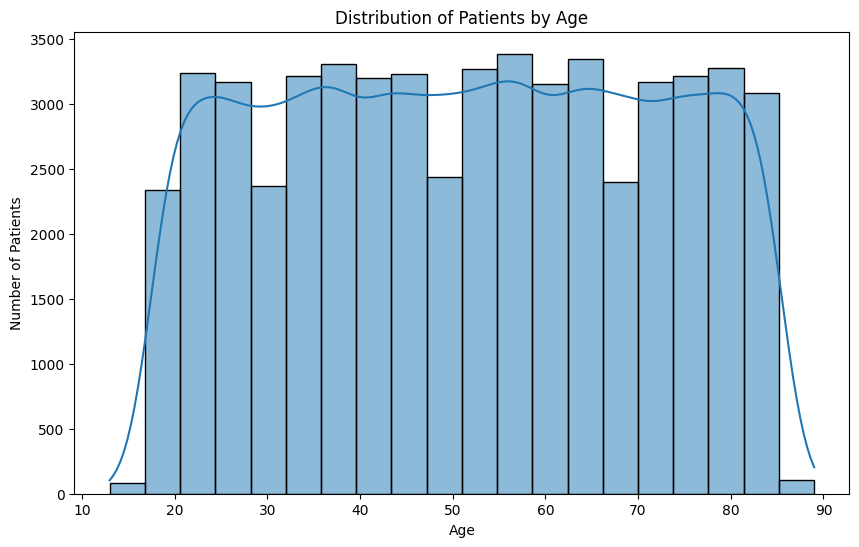

In [19]:
# Plot the distribution of patients by age using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)  # 'kde' adds a kernel density estimate to the histogram
plt.title('Distribution of Patients by Age')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

What are the most common blood types in the dataset?

In [20]:
# Count the occurrences of each unique blood type
blood_type_counts = df['Blood Type'].value_counts()

# Display the most common blood types
print(blood_type_counts)

Blood Type
A-     6898
A+     6896
B+     6885
AB+    6882
AB-    6874
B-     6872
O+     6855
O-     6804
Name: count, dtype: int64


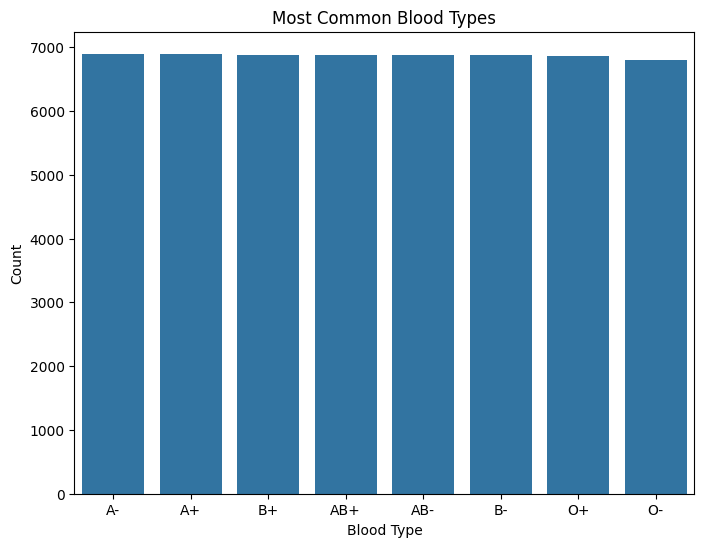

In [21]:
# Plot the most common blood types as a bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='Blood Type', data=df, order=blood_type_counts.index)
plt.title('Most Common Blood Types')
plt.xlabel('Blood Type')
plt.ylabel('Count')
plt.show()

Are there any seasonal trends in date of admission?

In [22]:
# Extract month from the 'date_of_admission'
df['month'] = df['Date of Admission'].dt.month

# Check the distribution of admissions by month
monthly_trends = df['month'].value_counts().sort_index()
print(monthly_trends)

month
1     4655
2     4210
3     4622
4     4478
5     4555
6     4650
7     4765
8     4785
9     4508
10    4613
11    4508
12    4617
Name: count, dtype: int64


How does the age of patients correlate with the medical condition?

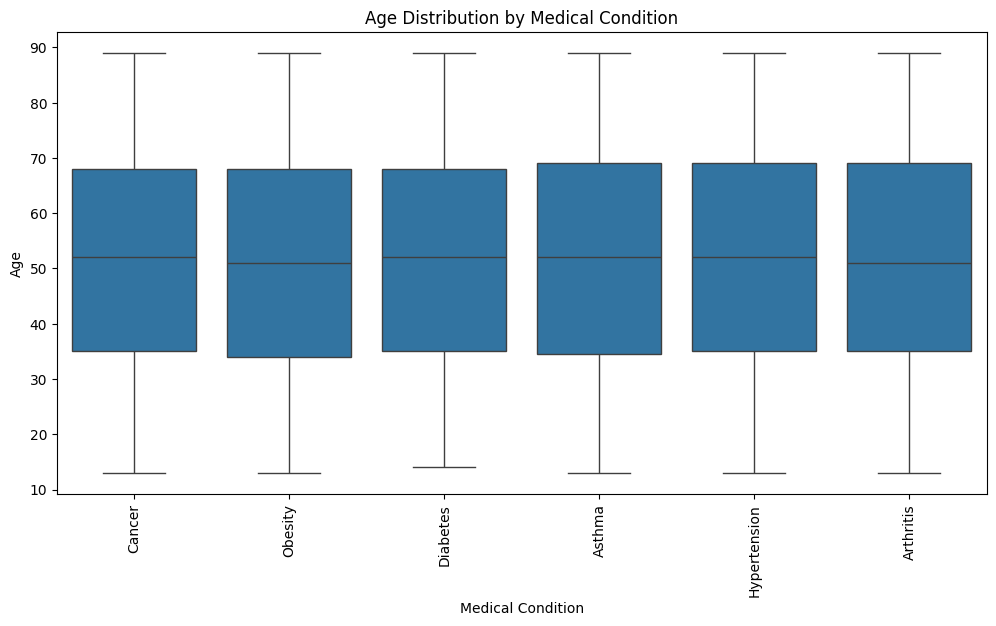

In [23]:
# Boxplot to show the distribution of age for each medical condition
plt.figure(figsize=(12, 6))
sns.boxplot(x='Medical Condition', y='Age', data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.title('Age Distribution by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Age')
plt.show()

Which doctors are treating the most patients?

In [24]:
#Checking patients seen by provider

doctor_patient_counts = df['Doctor'].value_counts()

print(doctor_patient_counts)

Doctor
Michael Smith        27
John Smith           22
Robert Smith         21
James Smith          20
Michael Johnson      20
                     ..
Ashley Patton DDS     1
Wanda Stark           1
Tiffany Gibson        1
Christy Klein         1
Jeffery Christian     1
Name: count, Length: 40341, dtype: int64


In [25]:
top_10_doctors = doctor_patient_counts.head(10)

print(top_10_doctors)

Doctor
Michael Smith       27
John Smith          22
Robert Smith        21
James Smith         20
Michael Johnson     20
Robert Johnson      19
David Smith         19
Michael Williams    18
Matthew Smith       17
John Johnson        17
Name: count, dtype: int64


What is the average billing amount per medical condition?

In [26]:
# Group by 'medical_condition' and calculate the average billing amount
avg_billing_per_condition = df.groupby('Medical Condition')['Billing Amount'].mean()

# Display the average billing amount per medical condition
print(avg_billing_per_condition)

Medical Condition
Arthritis       25511.783246
Asthma          25633.461696
Cancer          25152.322947
Diabetes        25660.478635
Hypertension    25503.058720
Obesity         25804.361902
Name: Billing Amount, dtype: float64


What is the distribution of billing amount across different hospitals?

In [27]:
# Group by 'Hospital' and calculate the total billing amount
total_billing_per_Hospital = df.groupby('Hospital')['Billing Amount'].sum()
pd.options.display.float_format = '{:,.2f}'.format

total_billing_per_Hospital = total_billing_per_Hospital.sort_values(ascending=False)

# Display the total billing amount per Hospital
print(total_billing_per_Hospital)

Hospital
Johnson PLC                         1,081,477.31
LLC Smith                           1,030,189.87
Smith PLC                           1,029,424.45
Ltd Smith                           1,003,365.53
Smith Ltd                             970,035.87
                                        ...     
Clements-Bowman                        -1,277.65
Diaz-Bishop                            -1,353.71
Fitzpatrick, Nielsen and Mcdonald      -1,774.05
Juarez-Clark                           -2,008.49
Medina and Elliott Stewart,            -2,633.24
Name: Billing Amount, Length: 39876, dtype: float64


How does insurance provider impact the billing amount?

In [30]:
# Group by 'insurance' and calculate the average billing amount
avg_billing_per_insurance = df.groupby('Insurance Provider')['Billing Amount'].mean()

avg_billing_per_insurance = avg_billing_per_insurance.sort_values(ascending=False)

# Display the average billing amount per insurance
print(avg_billing_per_insurance)

Insurance Provider
Medicare           25,628.32
Blue Cross         25,603.46
Aetna              25,549.69
Cigna              25,526.00
UnitedHealthcare   25,414.51
Name: Billing Amount, dtype: float64


In [29]:
# Group by 'insurance' and calculate the total billing amount
total_billing_per_insurance = df.groupby('Insurance Provider')['Billing Amount'].sum()
pd.options.display.float_format = '{:,.2f}'.format

total_billing_per_insurance = total_billing_per_insurance.sort_values(ascending=False)

# Display the total billing amount per insurance
print(total_billing_per_insurance)

Insurance Provider
Cigna              284,334,099.18
Medicare           282,911,026.77
Blue Cross         280,409,100.52
UnitedHealthcare   279,915,371.37
Aetna              276,498,741.37
Name: Billing Amount, dtype: float64


How does the admission type correlate with billing amount?




In [31]:
# Group by 'Admission Type' and calculate the total billing amount
total_billing_per_Admission_Type = df.groupby('Admission Type')['Billing Amount'].sum()
pd.options.display.float_format = '{:,.2f}'.format

total_billing_per_Admission_Type = total_billing_per_Admission_Type.sort_values(ascending=False)

# Display the total billing amount per Admission Type
print(total_billing_per_Admission_Type)

Admission Type
Elective    473,133,056.18
Urgent      469,237,758.85
Emergency   461,697,524.20
Name: Billing Amount, dtype: float64
